In [32]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import statsmodels.formula.api as smf

In [33]:
#Have to create a path to the data
path = 'C:\\Users\\Gebruiker\\OneDrive\\CLS PhD\\MPI\\Python_workshop\\Session_5stats\\session5'

In [45]:
results = pd.read_csv(os.path.join(path, "lexdec_results.csv"))  # Let's load in our participant data!
#print(results)

# Change the non-word condition name
results['frequency'] = results['frequency'].replace(['none'], 'NW')

#change the name of the first column name
results.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)


# Create a list of conditions
conditions = [
    results['frequency'].str.startswith('NW'),
    results['frequency'].str.startswith('LF'),
    results['frequency'].str.startswith('HF')
]
# Create a list of values we want to assign to each condition to be able to read easier
values = ['NW', 'LF', 'HF']

# Create a new column and assign values to the conditions
results['condition'] = np.select(conditions, values)

print(results)

     trial_order   id     word frequency  duration  reaction_time response  \
0              0  102   labber        NW  0.405079       0.740607        m   
1              1  163    plond        NW  0.567166       0.662209        m   
2              2  175   nergen        NW  0.544580       1.063122        m   
3              3   99      bij        HF  0.332517       0.751887        z   
4              4   94   gedaan        HF  0.624558       0.748802        z   
..           ...  ...      ...       ...       ...            ...      ...   
795          195   50   gisten        LF  0.546621       0.785617        z   
796          196  195   pirrel        NW  0.361179       0.733906        m   
797          197   24  wrongel        LF  0.538685       0.802661        m   
798          198  128  kandola        NW  0.500204       0.880469        m   
799          199   88     werd        HF  0.482426       0.998699        m   

     subject  accuracy condition  
0          1         1      

In [46]:
# Get an overview of the data

summary = results.groupby(by = 'condition').aggregate(
    mean_RT = pd.NamedAgg('reaction_time', np.mean),
    std_RT = pd.NamedAgg('reaction_time', np.std)
)

summary.reset_index(inplace=True)
print(summary)

  condition   mean_RT    std_RT
0        HF  0.793150  0.161619
1        LF  0.863831  0.188257
2        NW  0.842566  0.169741


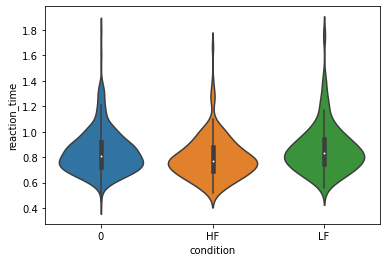

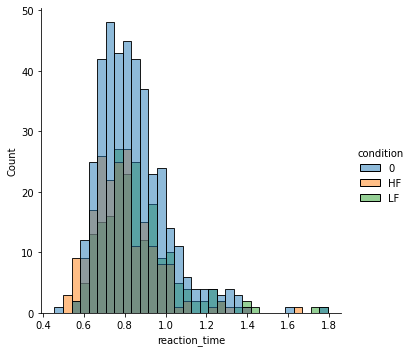

In [36]:
sns.violinplot(x = 'condition', y = 'reaction_time', data = results)
sns.displot(results, x = 'reaction_time', hue = 'condition')

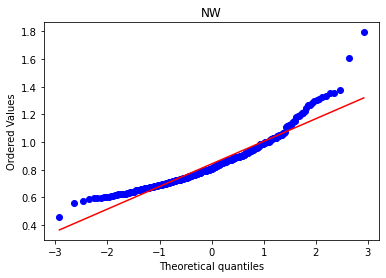

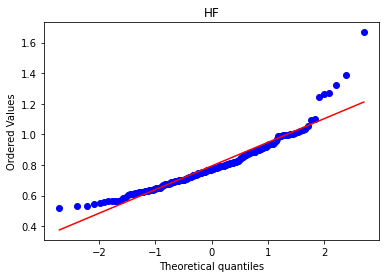

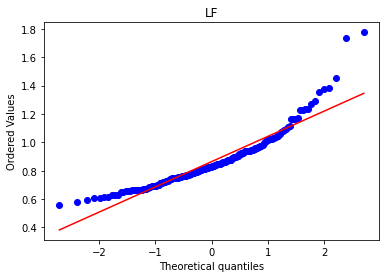

In [47]:
# QQ plot

for condition in ['NW', 'HF', 'LF']:
    plot = stats.probplot(results.loc[results['condition'] == condition, 'reaction_time'], plot = plt)
    plt.title(str(condition))
    plt.show()

#The NW, seems to not plot for some reason.
#I am not sure why
#I think this is because of the NONE in the freq_category. I am changing this now above
#Yes, this was the issue
#note: remember to changet none to another variable name because Python interprets it as a function

In [55]:
#linear mixed model import
import statsmodels.formula.api as smf

#reaction time as function of frequency
lmm_freq = smf.mixedlm('reaction_time ~ frequency', results, groups = 'response', re_formula = '1')
lmmf = lmm_freq.fit()

lmmf.summary()

#reaction time as a function of accuracy 
lmm_acc  = smf.mixedlm("reaction_time ~ accuracy", results, groups = "response", re_formula = "1" )
lmma = lmm_acc.fit()
lmma.summary()

c:\users\gebruiker\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\users\gebruiker\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: reaction_time
No. Observations: 800     Method:             REML         
No. Groups:       2       Scale:              0.0302       
Min. group size:  338     Log-Likelihood:     257.5405     
Max. group size:  462     Converged:          Yes          
Mean group size:  400.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.852    0.021 41.183 0.000  0.811  0.892
accuracy         -0.021    0.018 -1.159 0.246 -0.056  0.014
response Var      0.000    0.003                           
===========================================================

"""

In [49]:
#repeated measures ANOVA

RMA = AnovaRM(results, depvar="reaction_time", subject="id", within=["frequency"], aggregate_func="mean").fit()
print(rma)

#Data is unbalanced to fully use the RMA

ValueError: Data is unbalanced.

In [50]:
#T-test
hf_words = results.loc[results['condition'] == 'HF', 'reaction_time']
lf_words = results.loc[results['condition'] == 'LF', 'reaction_time']

print(stats.ttest_rel(hf_words, lf_words, nan_policy = 'raise'))

Ttest_relResult(statistic=-4.533809040041385, pvalue=9.991787230475802e-06)
